# CS5228 Kaggle Competition

## Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [47]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [48]:
train.shape , test.shape 

((431732, 17), (107934, 16))

In [49]:
train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float64
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  int64  
 10  latitude             431732 non-null  float64
 11  longitude            431732 non-null  float64
 12  elevation            431732 non-null  float64
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  region           

In [51]:
train = train.drop(columns = ["street_name",'eco_category','elevation'])

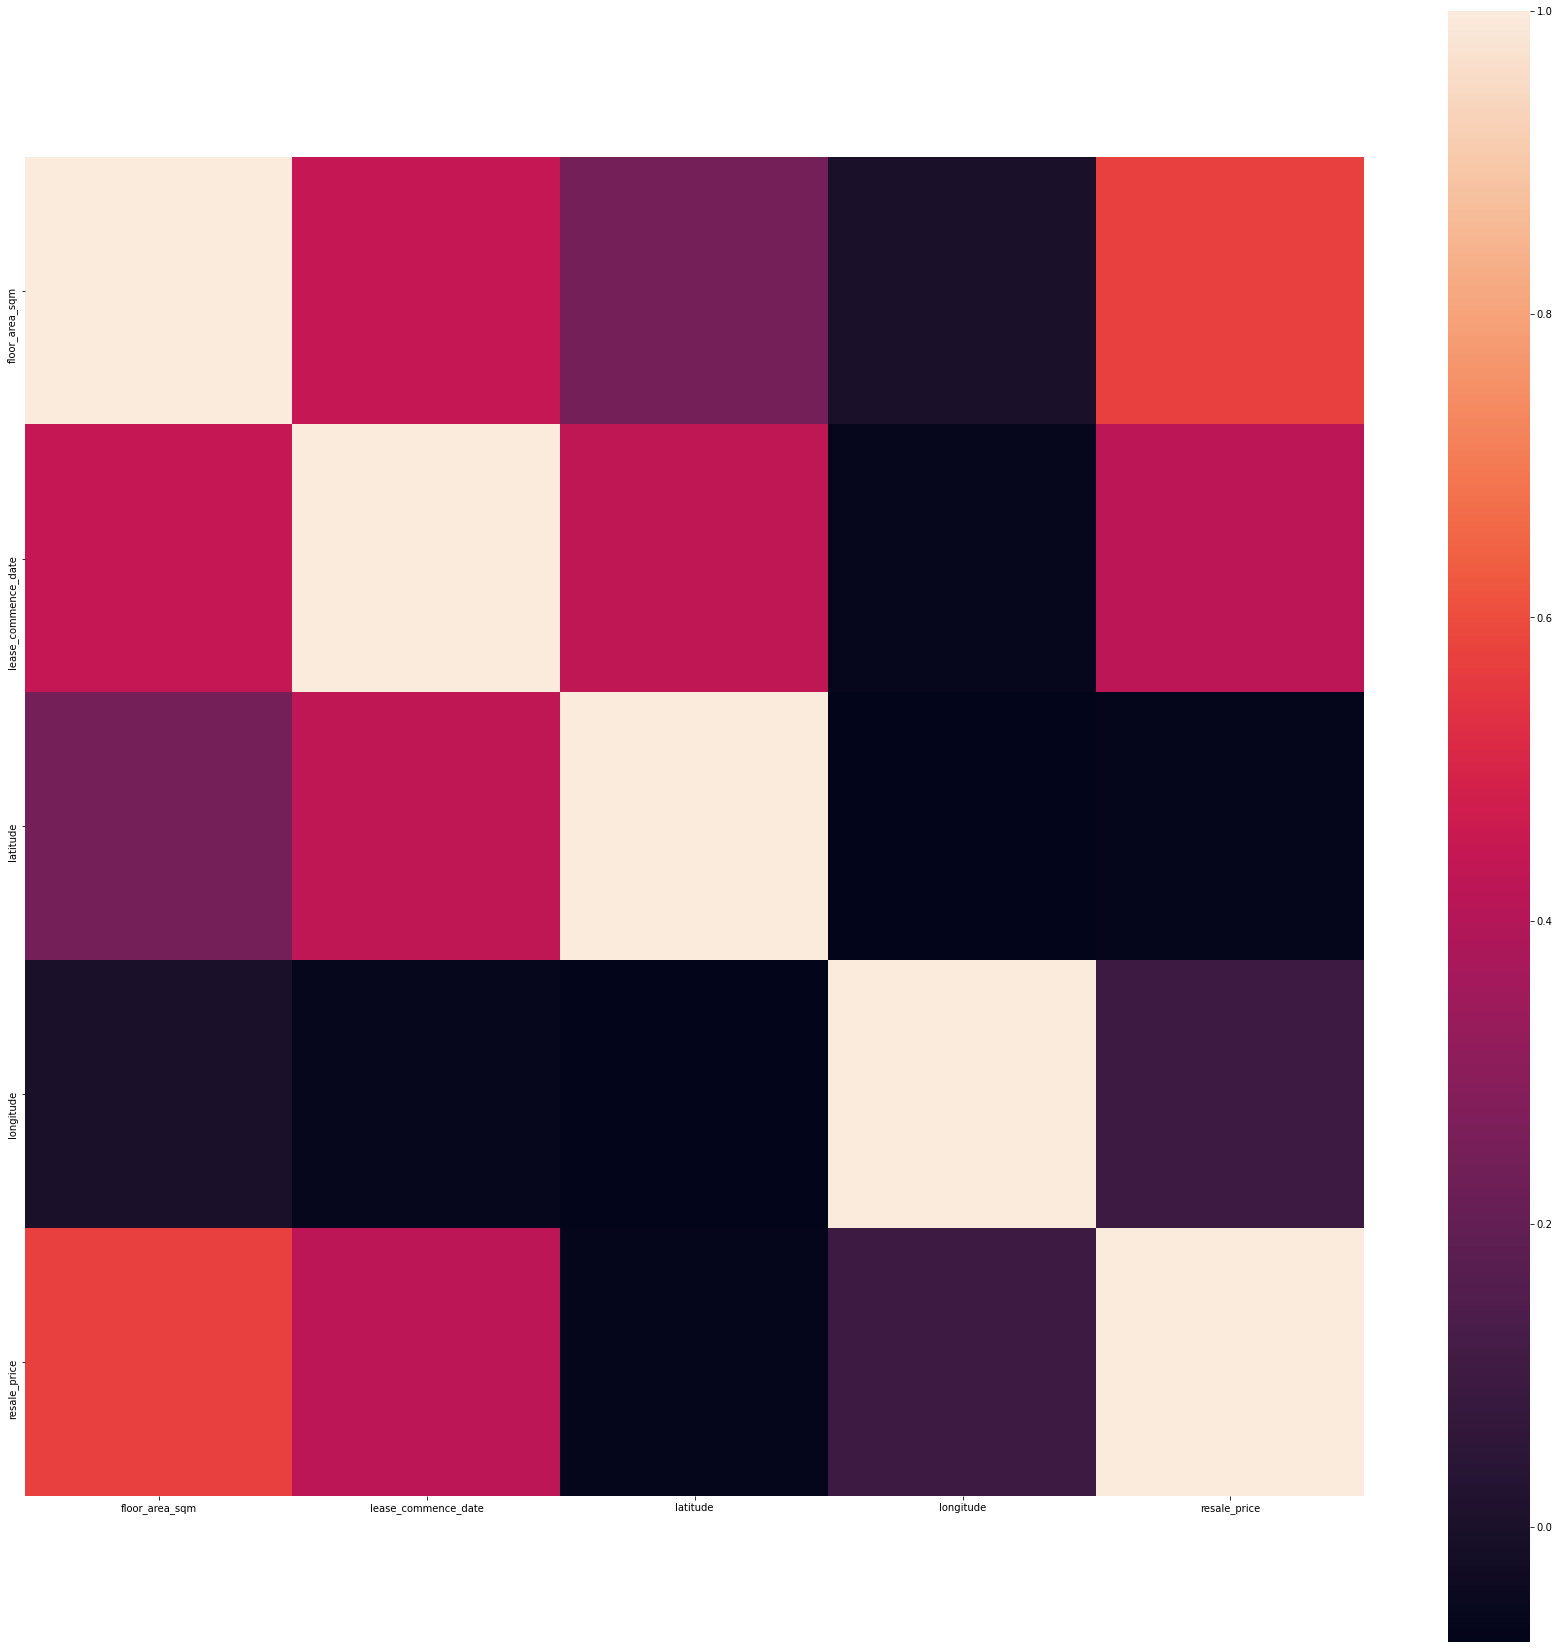

In [52]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, square=True);

In [53]:
train = pd.get_dummies(train, columns = ["town",'flat_type','flat_model','subzone','planning_area','region'])
train.head()

,month,block,storey_range,floor_area_sqm,lease_commence_date,latitude,longitude,resale_price,town_ang mo kio,town_bedok,...,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2001-08,440,01 to 03,118.0,1989,1.369008,103.958697,209700.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014-10,196B,10 to 12,110.0,2003,1.399007,103.906991,402300.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-09,404A,01 to 03,112.0,2004,1.388348,103.873815,351000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2000-10,375,07 to 09,67.0,1980,1.318493,103.766702,151200.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2013-01,163,07 to 09,73.0,1985,1.348149,103.742658,318600.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train['block'] = train['block'].str.replace(r'\D', '').astype(int)

In [55]:
train['floor_area_sqm'].astype(float)
train["latitude"].astype(float)
train['longitude'].astype(float)
train['resale_price'].astype(float)

0         209700.0
1         402300.0
2         351000.0
3         151200.0
4         318600.0
            ...   
431727    238500.0
431728    376200.0
431729    255600.0
431730    508500.0
431731    162000.0
Name: resale_price, Length: 431732, dtype: float64

In [56]:
y = pd.DatetimeIndex(train['month']).year
train['lease_commence_date'] = y-train['lease_commence_date']

In [57]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431732 entries, 0 to 431731
Columns: 258 entries, month to region_west region
dtypes: float64(4), int64(2), object(2), uint8(250)
memory usage: 132.6+ MB


In [58]:
train.head()

,month,block,storey_range,floor_area_sqm,lease_commence_date,latitude,longitude,resale_price,town_ang mo kio,town_bedok,...,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2001-08,440,01 to 03,118.0,12,1.369008,103.958697,209700.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014-10,196,10 to 12,110.0,11,1.399007,103.906991,402300.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-09,404,01 to 03,112.0,16,1.388348,103.873815,351000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2000-10,375,07 to 09,67.0,20,1.318493,103.766702,151200.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2013-01,163,07 to 09,73.0,28,1.348149,103.742658,318600.0,0,0,...,0,0,0,0,0,0,0,0,0,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resale_price', ylabel='Density'>

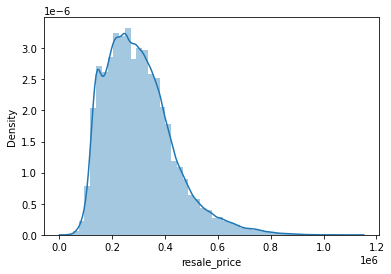

In [59]:
 sns.distplot(train['resale_price'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


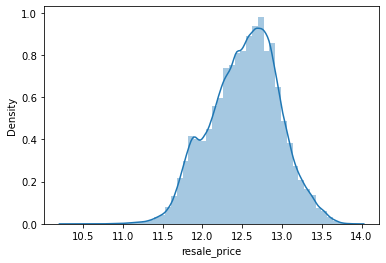

In [60]:
train['resale_price'] = np.log1p(train['resale_price'])
sns.distplot(train['resale_price']);

In [61]:
corr = train.corr()
print(corr["resale_price"].sort_values(ascending=False))

resale_price                 1.000000
floor_area_sqm               0.606928
flat_type_executive          0.314169
flat_type_5-room             0.258232
flat_type_5 room             0.241669
                               ...   
flat_model_standard         -0.113471
flat_model_simplified       -0.146363
flat_type_2 room            -0.156589
flat_model_new generation   -0.274367
flat_type_3 room            -0.565135
Name: resale_price, Length: 256, dtype: float64


# Dataset with integer encoding

In [76]:
train_2 = pd.read_csv('./train.csv')
train_2 = train_2.drop(columns = ["street_name",'eco_category','elevation'])

In [77]:
train_2['block'] = train_2['block'].str.replace(r'\D', '').astype(int)
train_2['floor_area_sqm'].astype(float)
train_2["latitude"].astype(float)
train_2['longitude'].astype(float)
train_2['resale_price'].astype(float)
y = pd.DatetimeIndex(train['month']).year
train_2['lease_commence_date'] = y-train_2['lease_commence_date']


In [78]:

train_2['resale_price'].round(2)

0         209700.0
1         402300.0
2         351000.0
3         151200.0
4         318600.0
            ...   
431727    238500.0
431728    376200.0
431729    255600.0
431730    508500.0
431731    162000.0
Name: resale_price, Length: 431732, dtype: float64

In [79]:
train_2["town"] = train_2["town"].astype('category')
train_2["flat_type"] = train_2["flat_type"].astype('category')
train_2["flat_model"] = train_2["flat_model"].astype('category')
train_2["subzone"] = train_2["subzone"].astype('category')
train_2["planning_area"] = train_2["planning_area"].astype('category')
train_2["region"] = train_2["region"].astype('category')

train_2["town"] = train_2["town"].cat.codes
train_2["flat_type"] = train_2["flat_type"].cat.codes
train_2["flat_model"] = train_2["flat_model"].cat.codes
train_2["subzone"] = train_2["subzone"].cat.codes
train_2["planning_area"] = train_2["planning_area"].cat.codes
train_2["region"] = train_2["region"].cat.codes
train_2.head()

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price
0,2001-08,16,6,440,01 to 03,118.0,7,12,1.369008,103.958697,94,19,1,209700.0
1,2014-10,17,9,196,10 to 12,110.0,4,11,1.399007,103.906991,100,20,3,402300.0
2,2020-09,20,8,404,01 to 03,112.0,12,16,1.388348,103.873815,46,24,3,351000.0
3,2000-10,9,4,375,07 to 09,67.0,11,20,1.318493,103.766702,34,9,4,151200.0
4,2013-01,3,5,163,07 to 09,73.0,7,28,1.348149,103.742658,22,3,4,318600.0


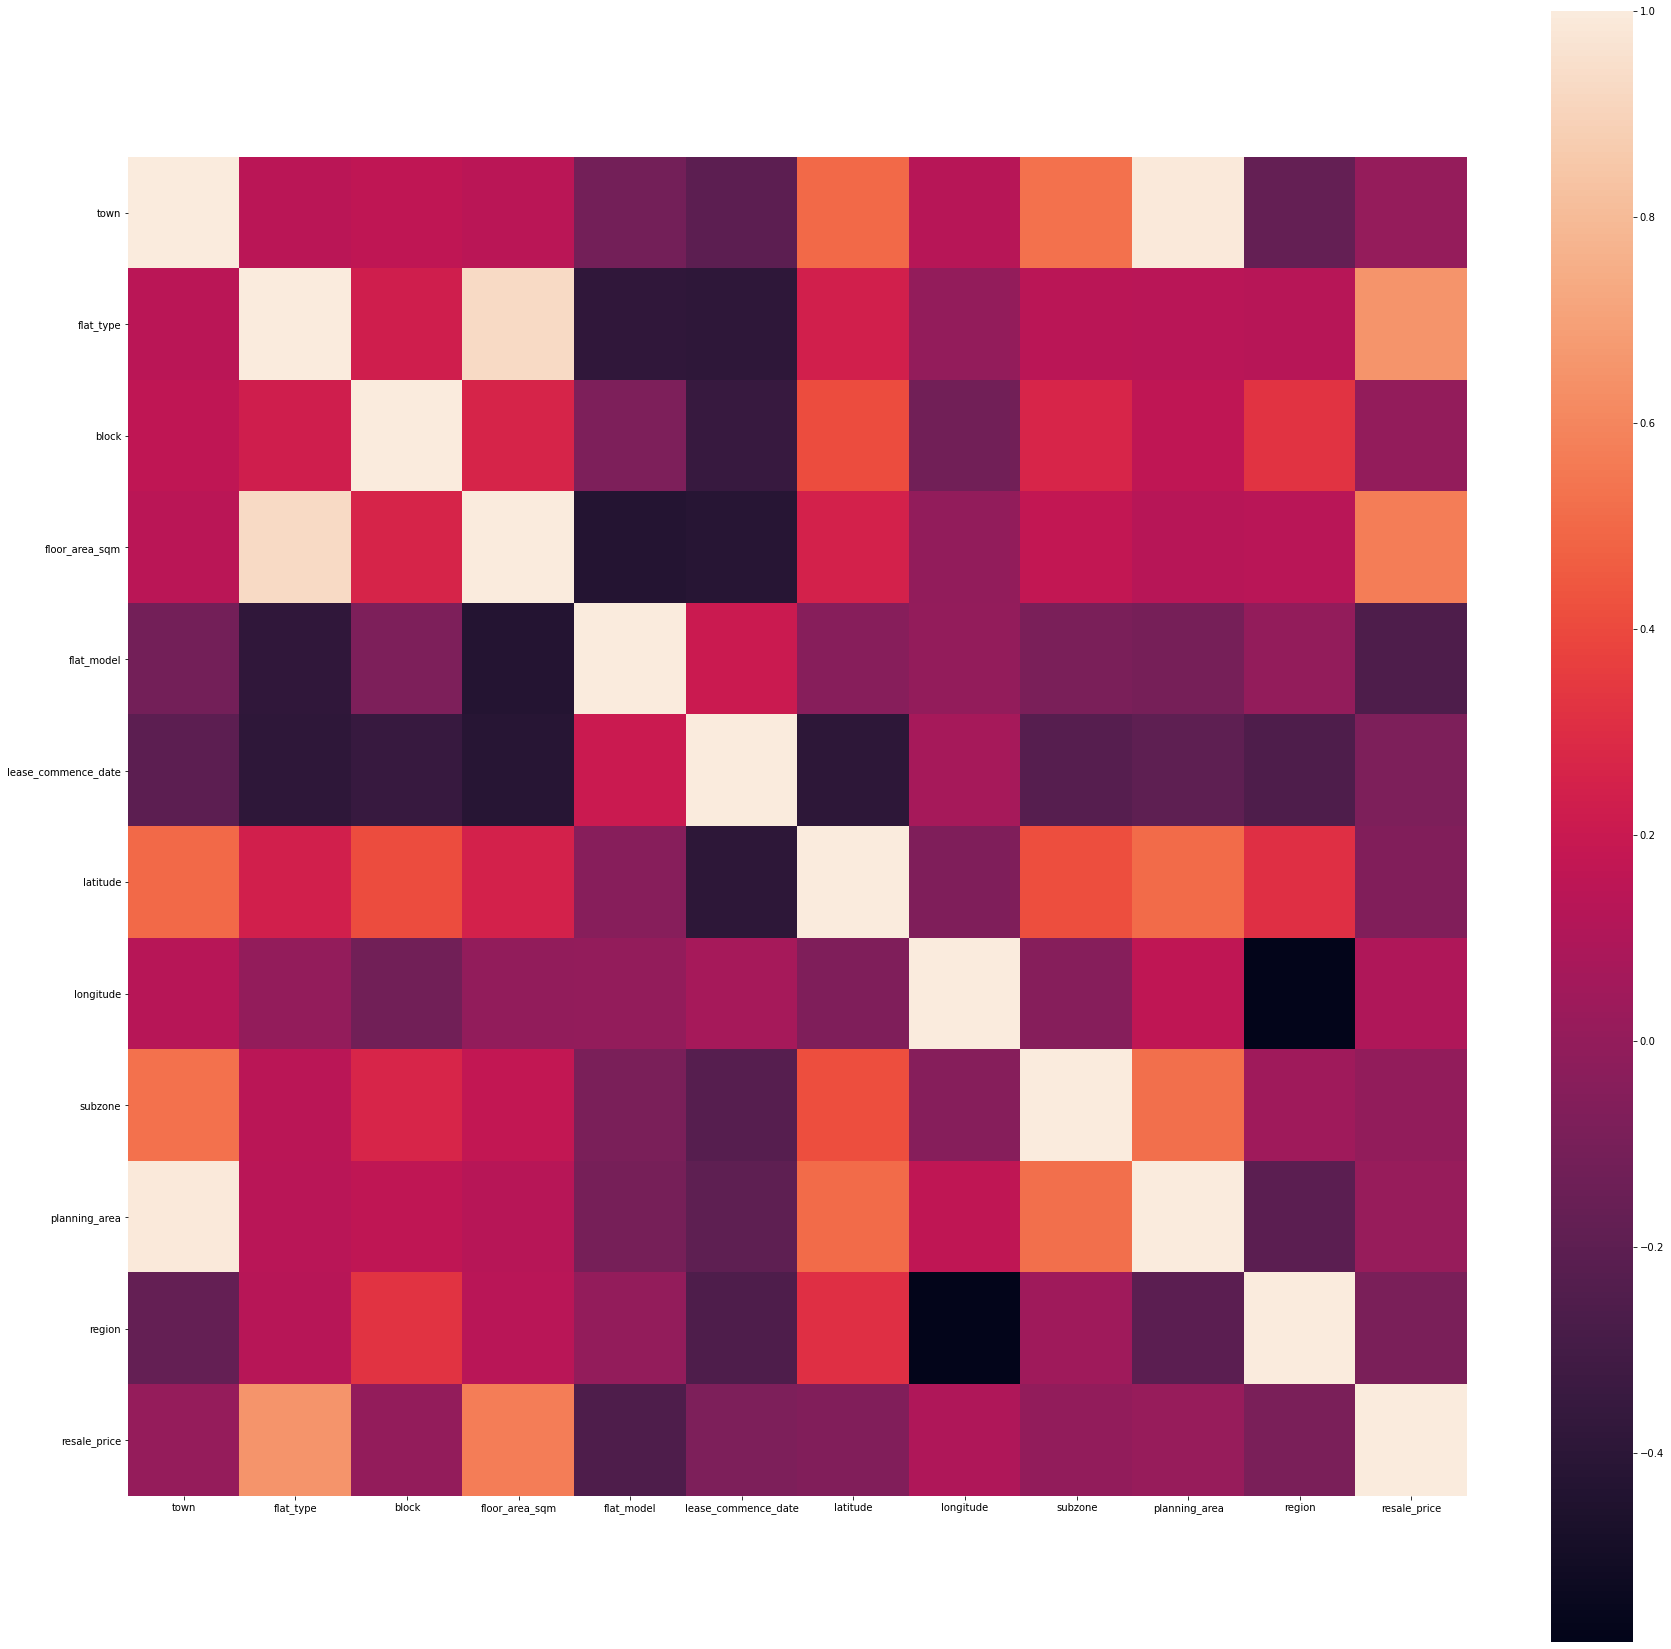

In [80]:
corrmat = train_2.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, square=True);

Result of heatmap much better

In [81]:
corr = train_2.corr()
print(corr["resale_price"].sort_values(ascending=False))

resale_price           1.000000
flat_type              0.648225
floor_area_sqm         0.570385
longitude              0.099786
planning_area          0.010298
town                   0.009851
block                  0.000722
subzone               -0.004170
latitude              -0.065915
lease_commence_date   -0.078242
region                -0.090236
flat_model            -0.257929
Name: resale_price, dtype: float64


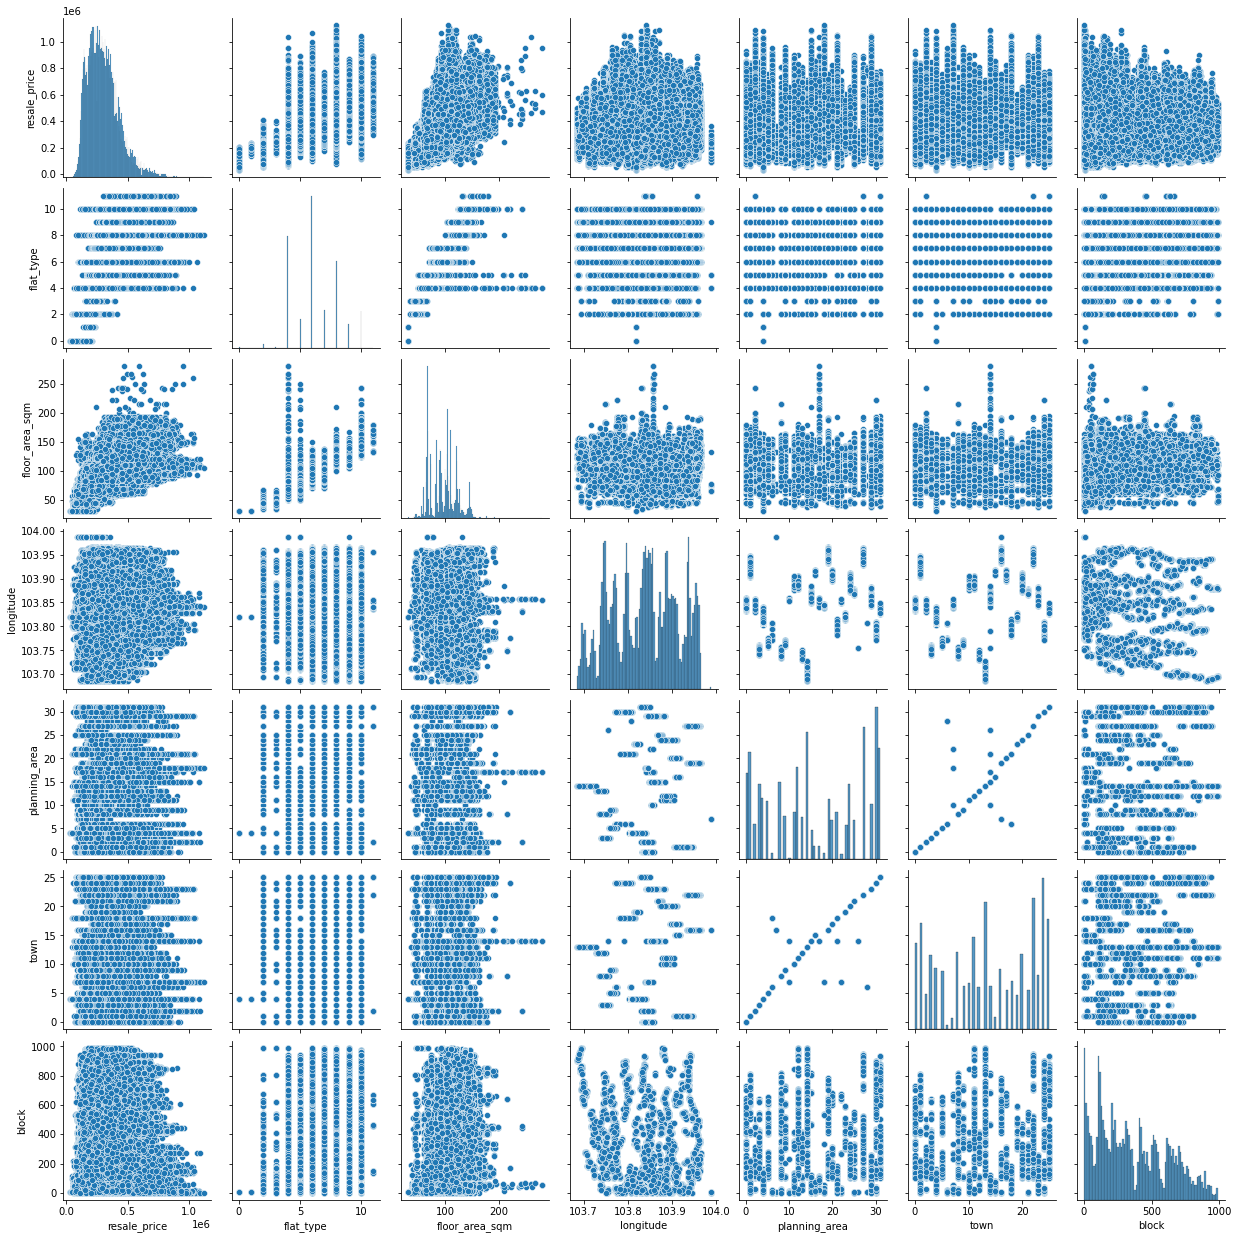

In [82]:
cols = ['resale_price', 'flat_type', 'floor_area_sqm', 'longitude', 'planning_area', 'town', 'block']
sns.pairplot(train_2[cols])

In [83]:
Total = train_2.isnull().sum().sort_values(ascending=False)
percent = (train_2.isnull().sum() / train_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
resale_price,0,0.0
region,0,0.0
planning_area,0,0.0
subzone,0,0.0
longitude,0,0.0
latitude,0,0.0
lease_commence_date,0,0.0
flat_model,0,0.0
floor_area_sqm,0,0.0
storey_range,0,0.0


In [84]:
print(train_2.head())

     month  town  flat_type  block storey_range  floor_area_sqm  flat_model  \
0  2001-08    16          6    440     01 to 03           118.0           7   
1  2014-10    17          9    196     10 to 12           110.0           4   
2  2020-09    20          8    404     01 to 03           112.0          12   
3  2000-10     9          4    375     07 to 09            67.0          11   
4  2013-01     3          5    163     07 to 09            73.0           7   

   lease_commence_date  latitude   longitude  subzone  planning_area  region  \
0                   12  1.369008  103.958697       94             19       1   
1                   11  1.399007  103.906991      100             20       3   
2                   16  1.388348  103.873815       46             24       3   
3                   20  1.318493  103.766702       34              9       4   
4                   28  1.348149  103.742658       22              3       4   

   resale_price  
0      209700.0  
1      4

In [85]:
print("Average resale price in Singapore: ",train_2["resale_price"].mean())
print('Maximum resale price in Singapore: ',train_2["resale_price"].max())
print("Minimum resale price in Singapore: ",train_2["resale_price"].min())

Average resale price in Singapore:  301819.58844276634
Maximum resale price in Singapore:  1123200.0
Minimum resale price in Singapore:  29700.0
